In [1]:
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

<function matplotlib.pyplot.show(*args, **kw)>

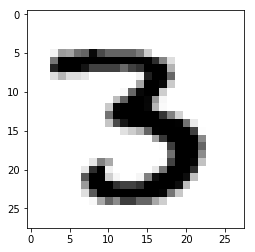

In [5]:
digit = train_images[12]
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show

In [6]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [7]:
from keras import models
from keras import layers

In [8]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

In [9]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [10]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

In [11]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [12]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 2s 26us/step - loss: 0.2573 - acc: 0.9245
Epoch 2/5
60000/60000 [==============================] - 1s 17us/step - loss: 0.1039 - acc: 0.9691
Epoch 3/5
60000/60000 [==============================] - 1s 18us/step - loss: 0.0689 - acc: 0.9792
Epoch 4/5
60000/60000 [==============================] - 1s 17us/step - loss: 0.0504 - acc: 0.9849
Epoch 5/5
60000/60000 [==============================] - 1s 17us/step - loss: 0.0378 - acc: 0.9886


In [13]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 0s 24us/step
test_acc: 0.9805


In [23]:
result = network.predict(test_images)
digit = test_images.reshape(10000, 28, 28)

def check_result(index):
    import numpy as np
    print('Prediction:', np.argmax(result[index]))
    plt.imshow(digit[index], cmap=plt.cm.binary)
    plt.show

Prediction: 9


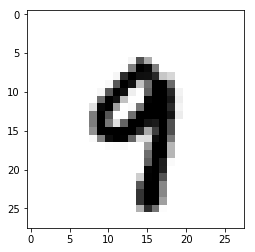

In [24]:
check_result(1013)